In [1]:
# Import libraries
import pandas as pd
import plotly.express as px
from pathlib import Path
import numpy as np
import re
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
%matplotlib inline

In [2]:
# Load CSVs
books_path = Path('Resources/books_cleaned.csv')
ratings_path = Path('Resources/ratings.csv')
users_path = Path('Resources/users_cleaned.csv')
books_df = pd.read_csv(books_path, index_col=0)
ratings_df = pd.read_csv(ratings_path, sep=';', on_bad_lines='warn', encoding='latin-1', index_col=False)
users_df = pd.read_csv(users_path, index_col=0)

In [3]:
# Check head
ratings_df.set_index('User-ID', inplace=True)
ratings_df.head()

,ISBN,Book-Rating
User-ID,,
276725,034545104X,0
276726,0155061224,5
276727,0446520802,0
276729,052165615X,3
276729,0521795028,6


In [4]:
# Drop Image-URL columns since they do not add value for recommendation system
books_df.drop(books_df.iloc[:, 5:8], inplace=True, axis=1)
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [5]:
# Check head
users_df.set_index('User-ID', inplace=True)
users_df.head()

,Location,Age
User-ID,,
1,"nyc, new york, usa",-1
2,"stockton, california, usa",18
3,"moscow, yukon territory, russia",-1
4,"porto, v.n.gaia, portugal",17
5,"farnborough, hants, united kingdom",-1


In [6]:
# Merge users_df with ratings_df
user_ratings_df = pd.merge(users_df, ratings_df, on='User-ID')

In [7]:
# Check head
user_ratings_df.head()

,Location,Age,ISBN,Book-Rating
User-ID,,,,
2,"stockton, california, usa",18,0195153448,0
7,"washington, dc, usa",-1,034542252,0
8,"timmins, ontario, canada",-1,0002005018,5
8,"timmins, ontario, canada",-1,0060973129,0
8,"timmins, ontario, canada",-1,0374157065,0


In [8]:
# Merge user_ratings_df with books_df
books_user_ratings_df = pd.merge(user_ratings_df, books_df, on='ISBN')

In [9]:
# Check head
books_user_ratings_df.head()

,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,"stockton, california, usa",18,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,"timmins, ontario, canada",-1,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,"ottawa, ontario, canada",49,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,"n/a, n/a, n/a",-1,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,"sudbury, ontario, canada",-1,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [10]:
# Check tail
books_user_ratings_df.tail()

,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
1031131,"dallas, texas, usa",33,0743203763,0,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,2000,Simon &amp; Schuster
1031132,"dallas, texas, usa",33,0767907566,5,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001,Broadway Books
1031133,"dallas, texas, usa",33,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985,Lone Star Books
1031134,"dallas, texas, usa",33,0912333022,7,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997,Kqed Books
1031135,"dallas, texas, usa",33,1569661057,10,"Dallas Street Map Guide and Directory, 2000 Ed...",Mapsco,1999,American Map Corporation


In [11]:
# users_df.set_index('User-ID', inplace=True)
users_df.head()

,Location,Age
User-ID,,
1,"nyc, new york, usa",-1
2,"stockton, california, usa",18
3,"moscow, yukon territory, russia",-1
4,"porto, v.n.gaia, portugal",17
5,"farnborough, hants, united kingdom",-1


# Exploratory Data Analysis

In [13]:
# Store total # of books, ratings and users in variables
n_books = len(books_df.index.unique())
n_ratings = len(ratings_df)
n_users = len(users_df.index.unique())

In [14]:
# Print count and average ratings per DataFrame
print(f"Number of ratings: {n_ratings}")
print(f"Number of unique books: {n_books}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per book: {round(n_ratings/n_books, 2)}")

Number of ratings: 1149780
Number of unique books: 271360
Number of unique users: 278858
Average ratings per user: 4.12
Average ratings per book: 4.24


In [15]:
# Sort book titles with highest ratings
books_user_ratings_df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False)

Book-Title
Film Is: The International Free Cinema                                                                                                    10.0
More Secrets of Happy Children: Embrace Your Power as a Parent--and Help Your Children be Confident, Positive, Well-Adjusted and Happy    10.0
Jo's Boys : From the Original Publisher                                                                                                   10.0
The Vanished Priestess : An Annie Szabo Mystery                                                                                           10.0
Game and Hunting                                                                                                                          10.0
                                                                                                                                          ... 
Invaders of the Planet Earth (Choose Your Own Adventure, No 70)                                                                    

In [18]:
# Count # of ratings per book and sort values
ratings_data = pd.DataFrame(books_user_ratings_df.groupby('Book-Title')['Book-Rating'].mean())

In [21]:
# Count # of ratings per book and sort values
ratings_data['Ratings-Count'] = pd.DataFrame(books_user_ratings_df.groupby('Book-Title')['Book-Rating'].count())

In [27]:
# Rename column for Average-Rating
ratings_data.rename(columns = {'Book-Rating': 'Average-Rating'}, inplace=True)

In [28]:
# Check head
ratings_data.head()

,Average-Rating,Ratings-Count
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.25,4
Always Have Popsicles,0.00,1
Apple Magic (The Collector's series),0.00,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.00,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.00,1


/Users/tyesondemets/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ratings-Count', ylabel='Density'>

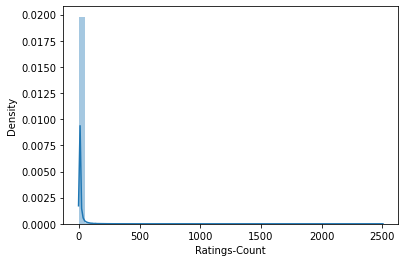

In [35]:
sns.distplot(ratings_data['Ratings-Count'])

/Users/tyesondemets/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average-Rating', ylabel='Density'>

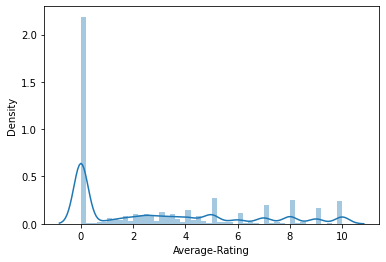

In [36]:
sns.distplot(ratings_data['Average-Rating'])